# HW2: MAT 321 - Numerical methods.

Author: Marc Aurèle Gilles

* You can (and probably should) discuss assignments with others, Qinxin and me, but you must write and understand any solutions/code that you submit. This rule should be followed in good faith and with adherence to the Honor Code.
* You must upload the assignment to Canvas before the deadline.



Disclaimer: this homework has a lot of text but most of it is background. There is also a lot of code, but most of it is provided for you. Each function you have to complete is indicated by

###ADD YOUR CODE HERE

You should try to understand what the rest of the code does, but you may assume you don't have to change the code. See precept 2 for the syntax of matrix operations if you need it.

## Problem 1: Poisson's equation
The second part of the class is focused on differential equations, but we have already everything we need to design our first numerical ODE solver. In this question, we derive a solution for Poisson's equation in 1D:
$$
- \frac{d^2}{dx^2} u(x) = f(x) \qquad u(0) = u(1) = 0 
$$
Here, $f(x)$ is given, and we are seeking $u(x)$.
In precept 2 we showed that we can estimate the second derivative of a function using the central differences
$$
D^2_h u(x) := \frac{u(x + h) - 2u(x) + u(x- h)}{h^2} = u''(x) + \mathcal{O}(h^2)
$$

We will discretize the interval [0,1] with the following n+2 points: $x_j = jh  $, $h = 1/(n+1)$ and write the function values of $u(x_j)$ for $j =1 \dots n$ in a vector $v$:
$$
v = \begin{bmatrix} 
u(x_1) \\
u(x_2) \\
\vdots \\
u(x_n)
\end{bmatrix}
$$

1.1:

Before we try to solve the ODE, let us consider a simpler problem: given the vector $v$ above, and assuming $ u(0) = u(1) = 0 $, find a matrix $T$ that computes the vector:
$$
T v =  \begin{bmatrix} 
- D^2_h u(x_1) \\
- D^2_h u(x_2) \\
\vdots \\
- D^2_h u(x_n)
\end{bmatrix}  
$$

Your task is to implement the function that constructs the matrix $T$ in the code below (and make sure it passes the tests below)


(Hint: if we look at $-D^2_hu(x)$ evaluated at $x=x_i$, we get row $i$ of the vector $v$ for $1 < i < n$ , which reads:
$$ [Tv]_i = - D^2_h u(x_i) = - \frac{u(x_i + h) - 2u(x_i) + u(x_i- h)}{h^2}  $$
Since $x_i = ih$, we have that $x_i + h = ih + h = (i+1)h = x_{i+1}$ and  $x_i -h = x_{i-1}$, 
$$[Tv]_i = - D^2_h u(x_i) = - \frac{u(x_{i+1}) - 2u(x_i) + u(x_{i-1})}{h^2} = -\frac{v_{i+1} - 2 v_i + v_{i-1}}{h^2} $$ 
where $[Tv]_i$ denotes entry i of the vector $Tv$.
Also note that the $x_i$ are fixed at this point, e.g., if we take $n = 3$, $h = 1/(3+1) = 1/4$ and the vector is:
$$
v = \begin{bmatrix} 
u(x_1) \\
u(x_2) \\
u(x_3)
\end{bmatrix} = 
\begin{bmatrix} 
u(1/4) \\
u(1/2) \\
u(3/4)
\end{bmatrix} 
$$
There are no more $x$'s!  )

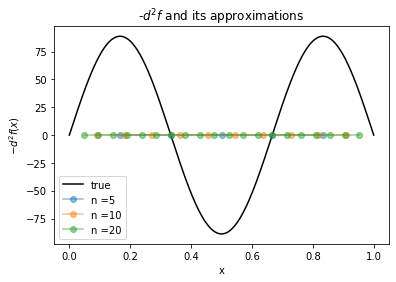

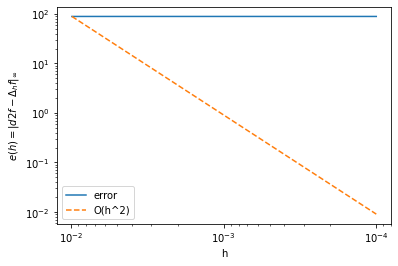

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def get_central_diff_matrix(n):
    ###ADD YOUR CODE HERE
    A = np.zeros((n,n))
    return A 

## ALL THE CODE BELOW IS PROVIDED FOR YOU.

# Computes the grid [ 1/(n+1), 2/(n+1), ..., n/(n+1)]
def get_grid(n):
    return np.linspace(start = 0, stop = 1, num = n+2)[1:-1]


# Computes the grid [0, 1/(n+1), 2/(n+1), ..., n+1/(n+1)]
# A test case, u = sin(k pi x ), with known second derivative 
k = 3
u_fn = lambda x : np.sin(k * np.pi * x)
f_fn = lambda x : (k*np.pi)**2 * np.sin(k * np.pi*x)
fine_n = int(1e6)
fine_grid = get_grid(fine_n)


# Plots successive finite difference discretization for increasing number of points
plt.figure()
plt.plot(fine_grid, f_fn(fine_grid), label = 'true', color = 'black')
for n in [5, 10,  20]:
    A = get_central_diff_matrix(n)
    grid = get_grid(n)
    v = u_fn(grid)
    b = A @ v
    plt.plot(grid, b, '-o', alpha = 0.5, label = 'n ='+ str(n))
    
plt.legend()
plt.ylabel('$-d^2 f(x)$')
plt.xlabel('x')
plt.title('-$d^2f$ and its approximations')


# Plot error as a function of n
ns = np.logspace(2, 4, 10).astype(int)
errors = np.zeros(10)
for idx, n in enumerate(ns):
    h = 1 / (n + 1)
    A = get_central_diff_matrix(n) 


    grid = get_grid(n)
    u = u_fn(grid)
    b = A @ u 
    exact_df2 =  f_fn(grid)
    errors[idx] = np.max(np.abs(exact_df2 - b))
    
hs = 1 / ( ns + 1)
plt.figure()
plt.loglog( hs, errors, label = 'error')

# Make a line with slope O(h^2), that intersect the timing plot at last index
# The error should decay at the same rate at this line.
line = hs**2 
scale = errors[0] / line[0] 
plt.loglog( hs, scale * line, '--', label = 'O(h^2)')
plt.legend()
plt.ylabel('$e(h) = |d2f - \Delta_h f|_{\infty}$')
plt.xlabel('h')
plt.gca().invert_xaxis()


### 1.2
If, instead, we are given a vector of values of the second derivatives $-u_{xx}(x)$ (call this function, say $f(x)$), and are seeking approximate values of $u(x)$, we can solve the linear system $Tv_h = b$, where
$$
b = 
\begin{bmatrix}
f(x_1)\\
f(x_2)\\
\vdots\\
f(x_n)\\
\end{bmatrix}
$$
to get an approximate solution $u_h$ to the ODE. Note that the boundary conditions are implicitly imposed by the way we built the matrix. This is called the finite-difference method.

In previous case, we were computing $-u_{xx}(x)$ approximately using samples of $u(x)$ and the Taylor reminder theorem guarantees that the error in the $\infty$-norm will decay as $\mathcal{O}(h^2)$. This does not directly imply that the inverse problem will have the same property, but in fact it does. We won't prove this (yet) but want to demonstrate it numerically.

Your task is to solve the ODE using the finite difference method, and make a convergence plot similar to the one above by computing the $\infty$-norm of the error (that is, $e_h = \max_i |(v_h)_i - u(x_i)|$) and showing that it decreases as $\mathcal{O}(h^2)$. To solve the linear system, you may call np.linalg.solve(). (In the coming weeks, we will see that there are much faster algorithm to solve this system than the general one implemented in np.linalg.solve(). )
We test this with the simple right-hand side $f(x) = -9 \pi^2 \sin(3 \pi x)$ defined above so that we can easily monitor the error, but this applies to any function $f(x)$.

In [29]:
n_tests = 10
ns = np.logspace(2, 4, n_tests).astype(int)
errors = np.zeros(n_tests)
### ADD YOUR CODE HERE
for idx, n in enumerate(ns):
    # Solve ODE of with size grid size n. 
    

    # Compute relative error in the solution 
    errors[idx] = 0 

# produce a log-log scaling plot
# As above, plot a line O(h^2)

## Problem 2: Fast matvecs

We showed in class that matrix-vector multiplication with a general $n \times n $ matrix has complexity $\mathcal{O}(n^2)$. However, we can do better in many cases, e.g. if $A = u v^T$ is an outer product there is an $\mathcal{O}(n)$ algorithm. We explore other such situations here.

### 2.1: truncated SVD.
Suppose you $A_k$ is the rank-$k$ truncated SVD of A $ \in \mathbb{R}^{n \times n} $, write a code that computes $ A_k v$ for some vector $v$ in $\mathcal{O}(kn) $


error in truncated SVD mat-vec: 1.0


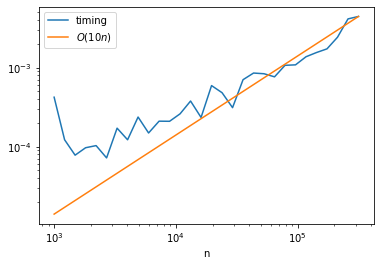

In [30]:
import time

def fast_truncated_svd_matvec(Uk, Sk, Vk, x):
    # Takes in:
    # Uk: a nxk matrix 
    # Sk: a vector of length k
    # Vk: a nxk matrix
    # x: a vector of length n

    ###ADD YOUR CODE HERE

    return np.zeros_like(x)

## ALL THE CODE BELOW IS PROVIDED.
def slow_truncated_svd_matvec(Uk, Sk, Vk, x):
    # Takes in:
    # Uk: a nxk matrix 
    # Sk: a vector of length k
    # Vk: a nxk matrix
    # x: a vector of length n
    # Computes A_k x the slow way:
    A_k = (Uk @ np.diag(Sk)) @ Vk.T 
    return A_k @ x


# Testing for correctness
n = 100
A = np.random.randn(n, n)
[U,S,Vh] = np.linalg.svd(A)
k = 10 #rank 10 truncated SVD
Uk = U[:,:k]; Sk = S[:k]; Vk = Vh[:k,:].T

x = np.random.randn(n)
error = np.linalg.norm(slow_truncated_svd_matvec(Uk, Sk, Vk, x) - fast_truncated_svd_matvec(Uk, Sk, Vk, x) ) / np.linalg.norm(slow_truncated_svd_matvec(Uk, Sk, Vk, x) )
# Should be close to machine epsilon
print('error in truncated SVD mat-vec:', error)

# Testing complexity
ns = np.logspace(3,5.5, 30).astype(int)
timing = np.zeros(30)
for n_idx,n in enumerate(ns):
    # "Fake rank 10 SVD"

    # These matrices may not have orthonormal columns, but for checking scaling, it doesn't matter
    Uk = np.random.randn(n, 10) 
    Vk = np.random.randn(n, 10)
    Sk = np.random.randn(10)
    x = np.random.randn(n)

    # Repeat 10 times for more accurate timing
    st_time = time.time()
    for _ in range(10):
        y = fast_truncated_svd_matvec(Uk, Sk, Vk, x)
    timing[n_idx] =  time.time() - st_time

# Scaling plot
plt.figure()
plt.loglog(ns, timing, label = 'timing')
scale =   timing[-1] / ns[-1]
plt.loglog(ns, ns * scale, label = '$O(10 n)$')
plt.xlabel('n')
plt.legend()


### 2.2: Circulant matrices

The Discrete Fourier Transform (DFT) of a vector $x \in \mathbb{C}^n$ is the vector $y\in \mathbb{C}^n$ defined by:
$$
y_k = \sum_{j=0}^{n-1} x_j \exp(-i2\pi k j / n )
$$
(Here, vectors are 0-indexed by convention)
In other words, it is the result of the matrix-vector multiply $Fx$ between the matrix 
$$
F =  \begin{bmatrix}
1 & 1 & 1 & 1 & \cdots & 1    \\
1 & \omega & \omega^2 &  \omega^3 & \cdots & \omega^{n-1}    \\
1 & \omega^2 & \omega^4 &  \omega^6 & \cdots & \omega^{2(n-1)}    \\
1 & \omega^3 & \omega^6 &  \omega^9 & \cdots & \omega^{2(n-1)}    \\
\vdots & \vdots & \vdots & \vdots  & \ddots & \ddots   \\
1 & \omega^{n-1} & \omega^{2(n-1)} & \omega^{3(n-1)}  & \cdots & \omega^{(n-1)(n-1)}    \\
\end{bmatrix}
$$
where $\omega = \exp(-i 2 \pi / (n-1)) $, and the vector
$$
x =  \begin{bmatrix}
x_0 \\
x_1 \\
\vdots \\
x_{n-1}
\end{bmatrix} \ .
$$


The fast Fourier transform (FFT) [Cooley–Tukey,1961] is an algorithm that computes the vector $Fx$ in $\mathcal{O}(n \log n) $ operations. The FFT has been described (by someone a little older than you) as "the most important numerical algorithm of our lifetime" due its wide ranging applications in science and engineering. Time permitting, we will derive the FFT towards the end of the class, but for now we will treat is as a blackbox that computes $Fx$. In python, it can be computed by: np.fft.fft(x). Similarly, the inverse FFT that computes $F^{-1}x$ can be computed by np.fft.ifft(x). 

Circulant matrices are square matrices in which all row vectors are composed of the same elements and each row vector is rotated one element to the right relative to the preceding row vector. For example, a $5 \times 5$ circulant matrix takes the form:

$$ 
C = \qquad\begin{bmatrix}
c_0 & c_4 & c_3 & c_2 & c_1 \\
c_1 & c_0 & c_4 & c_3 & c_2 \\
c_2 & c_1 & c_0 & c_4 & c_3 \\
c_3 & c_2 & c_1 & c_0 & c_4 \\
c_4 & c_3 & c_2 & c_1 & c_0 
\end{bmatrix}
$$
The first column of $C$, usually called the signature $c = [ c_0, c_1, \dots c_{n -1}]$, completely describes the matrix.
Circulant matrices have an amazing property: they are diagonalized by the DFT, that is:
$$
C = F^{-1} D F
$$
where $D$ is diagonal, and its diagonal entries are given by $\text{diag}(D) = Fc $ (this notation means $d_{ii} = [Fc]_i$ so that the i-th diagonal entry is the i_th component of the vector $Fc$ ).
Using this fact and the FFT, write an algorithm that computes $Cx$ in $\mathcal{O}(n \log n )$ operations.

error in circulant mat-vec: 4.230897653614654


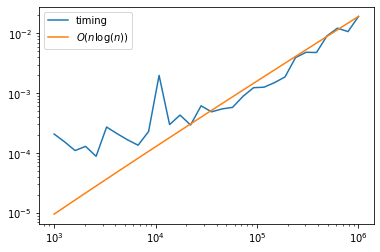

In [31]:
import scipy.linalg

def circulant_matvec(c,x):
    ###ADD YOUR CODE HERE
    return np.zeros_like(x)

### Code below is provided for you. No need to change it

# Testing for correctness
n = 10
c = np.random.randn(n)
C = scipy.linalg.circulant(c) # Forms the n \times n circulant matrix
x = np.random.randn(n)
# C@x is an O(n^2) algorithm!
error = np.linalg.norm(C@x - circulant_matvec(c,x) )
print('error in circulant mat-vec:', error)


# Testing complexity
ns = np.logspace(3,6, 30).astype(int)
timing = np.zeros(30)
for n_idx,n in enumerate(ns):
    c = np.random.randn(n)
    x = np.random.randn(n)
    st_time = time.time()
    for _ in range(10):
        y = circulant_matvec(c,x)
    timing[n_idx] =  time.time() - st_time

# Scaling plot
plt.figure()
plt.loglog(ns, timing, label = 'timing')
scale =   timing[-1] / (ns[-1] * np.log(ns[-1]))
# If your implementation is correct, the two lines should be roughly parallel (up to some noise)
plt.loglog(ns, ns * np.log(ns) * scale, label = '$O(n \log(n))$')
plt.legend()

### 2.3: Toeplitz matrices

Toeplitz matrices are matrices whose entries are constant along diagonals.
E.g., the following $5 \times 5$ matrix is Toeplitz:
$$ 
T = \qquad\begin{bmatrix}
c_0 & r_1 & r_2 & r_3 & r_4 \\
c_1 & c_0 & r_1 & r_2 & r_3 \\
c_2 & c_1 & c_0 & r_1 & r_2 \\
c_3 & c_2 & c_1 & c_0 & r_1 \\
c_4 & c_3 & c_2 & c_1 & c_0 
\end{bmatrix}
$$
Note that circulant matrices are Toeplitz, but Toeplitz matrices are not circulant!
However, one can always embed an $n \times n $ Toeplitz matrix into a larger $2n \times 2n$ circulant matrix. For example, the $5 \times 5$ (1,1) block of the matrix below is T: 
$$ 
A = \qquad\begin{bmatrix}
c_0 & r_1 & r_2 & r_3 & r_4 & 0 & c_4 & c_3 & c_2 & c_1 \\
c_1 & c_0 & r_1 & r_2 & r_3 & r_4 & 0 & c_4 & c_3 & c_2 \\
c_2 & c_1 & c_0 & r_1 & r_2 & r_3 & r_4 & 0 & c_4 & c_3  \\
c_3 & c_2 & c_1 & c_0 & r_1 & r_2 & r_3 & r_4 & 0 & c_4  \\
c_4 & c_3 & c_2 & c_1 & c_0 & r_1 & r_2 & r_3 & r_4 & 0  \\
0 & c_4 & c_3 & c_2 & c_1 & c_0 & r_1 & r_2 & r_3 & r_4 \\
r_4 & 0 & c_4 & c_3 & c_2 & c_1 & c_0 & r_1 & r_2 & r_3 \\
r_3 & r_4 & 0 & c_4 & c_3 & c_2 & c_1 & c_0 & r_1 & r_2 \\
r_2 & r_3 & r_4 & 0 & c_4 & c_3 & c_2 & c_1 & c_0 & r_1 \\
r_1 & r_2 & r_3 & r_4 & 0 & c_4 & c_3 & c_2 & c_1 & c_0  \\
\end{bmatrix}
$$

Thus, we can write any Toeplitz matrix $T \in \mathbb{R}^{n \times n} $ as: 
 $T = \begin{bmatrix} I_{n,n} & 0_{n,n} \end{bmatrix} A \begin{bmatrix} I_{n,n} \\ 0_{n,n} \end{bmatrix} $
where $A\in \mathbb{R}^{2n \times 2n}$ is the circulant embedding, $I_{n,n}$ is the $n\times n$ identity matrix, and $0_{n,n}$ is the $n\times n$ zero matrix. Using this fact, design and implement an $\mathcal{O}(n \log n)$ algorithm for matrix vector multiplication with a Toeplitz matrix $T$.

error in Toeplitz mat-vec: 6.069032938782992


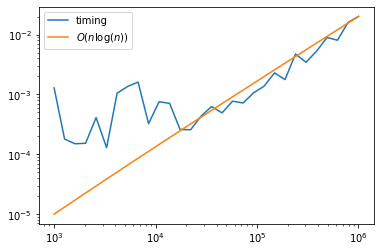

In [32]:
def toeplitz_matvec(c,r,x):
    ###ADD YOUR CODE HERE
    return np.zeros_like(x)

### Code below is provided for you. No need to change it

# Testing for correctness
n = 10
c = np.random.randn(n) # First column of T
r = np.random.randn(n) # First row of T. Must have r[0] == c[0] (since they are the same entry)
r[0] = c[0]
T = scipy.linalg.toeplitz(c,r) # Forms the n \times n Toeplitz matrix
x = np.random.randn(n)
# Note that T@x is a O(n^2) algorithm once more
error = np.linalg.norm(T@x - toeplitz_matvec(c,r,x) )
print('error in Toeplitz mat-vec:', error)


# Testing complexity
ns = np.logspace(3,6, 30).astype(int)
timing = np.zeros(30)
for n_idx,n in enumerate(ns):
    c = np.random.randn(n)
    r = np.random.randn(n)
    r[0] = c[0]
    x = np.random.randn(n)
    st_time = time.time()
    for _ in range(10):
        y = toeplitz_matvec(c,r,x)
    timing[n_idx] =  time.time() - st_time

# Scaling plot
plt.figure()
plt.loglog(ns, timing, label = 'timing')
scale =   timing[-1] / (ns[-1] * np.log(ns[-1]))
plt.loglog(ns, ns * np.log(ns) * scale, label = '$O(n \log(n))$')
plt.legend()


## Problem 3: Always a BLAS
In this problem we will explore the limits of our model for reasoning about the speed of algorithms. Recall that we reason about the speed of an algorithm through their complexity, by counting the number of floating point operations (flop).

BLAS (Basic Linear Algebra Subprograms) are the low-level optimized implementation of the basic linear algebra operations. They are separated into levels:
* Level 1 BLAS are vector operations that do $\mathcal{O}(n)$ flops: e.g., dot products, adding two vectors, scaling a vector
* Level 2 BLAS are operations that do $\mathcal{O}(n^2)$ flops: matrix-vector multiply, outer product
* Level 3 BLAS are operations that do $\mathcal{O}(n^3)$ flops: matrix-matrix multiply (while we saw in class that there exist algorithm for matrix-matrix multiplication with better complexity, they are rarely used in practice as they are slower except for huge matrices).


One can write one matrix-matrix multiply of two $n \times n$ matrices  (a level 3 BLAS operation) as $n$ matrix-vector multiplies ($n$ level 2 BLAS operations), thus one might think that they have comparable running time. This is, however, not what we see in practice. The reason for this is that BLAS level 3 operations are highly optimized and benefit from low data transfer to compute ratio. 
In pratice, this means that one should always use the highest level of BLAS possible, e.g., if you do many BLAS level 1 operations, try to replace them with a BLAS level 2 operation.


We will illustrate this by looking at a specific computation: computing the pairwise distances between two sets of vectors. 
Suppose we have two sets of points in $m$ dimensions: $\{ x_i\}_{i=1}^{n}$, $\{ y_j \}_{j=1}^{l}$, $x_i, y_j \in \mathbb{R}^m$ and we would like to compute the pairwise distance-squared between the two $d(x_i, y_j) =  \| x_i - y_j \|^2$ .
This operation is fundamental in data science application, e.g., for clustering.

The naive implementation of this operation with two nested for-loops (provided below) uses $n \times l$ level 1 BLAS operations, and thus has complexity $\mathcal{O}(nlm)$.
Our goal is to rewrite it with higher level BLAS operations, but the complexity will remain the same.

### 3.1: 
Your first task is to express the matrix with entries:
$$
[H]_{i,j} =  \| x_i - y_j \|^2
$$
as the product of three matrices: two rank-1 matrices and the matrix $-2X^T Y$, where $X \in \mathbb{R}^{m \times n}$ is the matrix with columns $\{x_i\}$ and $Y \in \mathbb{R}^{m \times l}$ is the matrix with column $\{y_i\}$. That is, find $u_1, v_1$ and $u_2, v_2$ such that
$$
H = u_1v_1^T +  u_2 v_2^T - 2X^TY 
$$


#### Write your answer to part 3.1 in this cell (use math and words, NOT code!)

### 3.2: 
Your second task is to implement this formula with one level 3 BLAS operations, a few (say 4) level 2 BLAS operations and at most $O(n)$ level 1 BLAS operations, and check the difference in running time. You don't have to justify your operation count but make sure it is right!

In [33]:
def fast_pairwise_distance(X,Y):
    # Computes the Euclidean pairwise distance between the columns of X and Y 
    # using high level BLAS operations

    ###ADD YOUR CODE HERE
    B = - 2*X.T @ Y 
    B += np.linalg.norm(X,axis =0)[...,None]**2
    B += np.linalg.norm(Y,axis =0)**2

    return B




### Code below is provided for you. No need to change it

def naive_pairwise_distance(X,Y):
    # Computes the Euclidean pairwise distance between the columns of X and Y the slow way
    B = np.zeros((X.shape[1], Y.shape[1]))
    for i in range(X.shape[1]):
        for j in range(Y.shape[1]):
            B[i,j] = np.linalg.norm(X[:,i] - Y[:,j])**2
    return B


# Testing for correctness
n, l, m = 11, 12, 13
X = np.random.randn(m,n)
Y = np.random.randn(m,l)

error = np.linalg.norm(fast_pairwise_distance(X,Y) - naive_pairwise_distance(X,Y) ) / np.linalg.norm(naive_pairwise_distance(X,Y))
print('absolute error in pairwise distance:', error)


# Testing for speed
n, l, m = 1000, 500, 3000
X = np.random.randn(m,n)
Y = np.random.randn(m,l)

st_time = time.time()
naive_pairwise_distance(X,Y) 
naive_time = time.time() - st_time
print('time for naive computation:' , naive_time)

st_time = time.time()
fast_pairwise_distance(X,Y) 
fast_time = time.time() - st_time
print('time for fast computation:', fast_time)

print('Fast computation is :', naive_time / fast_time, ' faster!')


absolute error in pairwise distance: 2.0993936695892569e-16
time for naive computation: 20.39356279373169
time for fast computation: 0.06517601013183594
Fast computation is : 312.89983465511693  faster!


### 3.3: Fast image alignment

A related problem is image alignment, where one seeks to align two images as shown below.

![image alignment](image_alignment2.png)


(if the image does not appear, see the image_alignment.png in your folder)

To make our life simpler, we will consider 1D signals that are periodic, but the ideas translate to images. 
A natural idea to align two signals is to find the translation of one signal that results in the smallest difference between the two signals (this is illustrated in the figure). That is, we seek the translation $t$ that minimizes
$$d( S(y_1,t), y_2) = \| S(y_1,t) - y_2\|^2$$
where $S(y_1,t)$ is the operator that shifts circularly the signal by $t$ pixels. 
This task can get prohibitively expensive quickly for large datasets of images, so it is often important to do this computation as efficiently as possible.

Your task is to design and implement an algorithm to compute all m entries of the vector
$$
d = \begin{bmatrix}
 d( S(y_1,0), y_2) \\
  d( S(y_1,1), y_2) \\
  \vdots,\\
  d( S(y_1,m-1), y_2) 
\end{bmatrix}
$$

in $\mathcal{O}(m \log m)$ operations. 

In [34]:
def fast_translation_computation(y1, y2):
    # Implement a O(n log n ) method to compute the norm squared difference of the shifts of y1 and y2.
    ###ADD YOUR CODE HERE
    ###ADD YOUR CODE HERE
    m = y1.size
   
    #y1 operations
    temp = [np.dot(y1, y1) for i in range(m)]
    y1sq = np.array(temp)
   
    #y2 operations
    temp = [np.dot(y2, y2) for i in range(m)]
    y2sq = np.array(temp)

    #SY1Y2 operations
    c = y1.copy()
    c[1:] = np.flip(y1[1:]) 

    D = np.fft.fft(c)

    Fx = np.fft.fft(y2)
    y1y2 = np.fft.ifft(D * Fx)
   
    B = y1sq + y2sq - 2 * y1y2
    # import pdb; pdb.set_trace()
    return B


### Code below is provided for you. No need to change it
def naive_translation_computation(y1, y2):
    m = y1.size
    B = np.zeros(n)
    for k in range(m):
        B[k] = np.linalg.norm(np.roll(y1, k) - y2)**2
    return B


# Testing for correctness
m = 10
y1 = np.random.randn(m)
y2 = np.random.randn(m)
error = np.linalg.norm(naive_translation_computation(y1,y2) - fast_translation_computation(y1,y2) ) / np.linalg.norm(naive_translation_computation(y1,y2))
print('absolute error in shifted distances:', error)


# Testing complexity
ns = np.logspace(3,6, 30).astype(int)
timing = np.zeros(30)
for n_idx,n in enumerate(ns):
    y1 = np.random.randn(n)
    y2 = np.random.randn(n)
    st_time = time.time()
    for _ in range(10):
        fast_translation_computation(y1,y2)
    timing[n_idx] =  time.time() - st_time

# Scaling plot
plt.figure()
plt.loglog(ns, timing, label = 'timing')
scale =   timing[-1] / (ns[-1] * np.log(ns[-1]))
plt.loglog(ns, ns * np.log(ns) * scale, label = '$O(n \log(n))$')
plt.legend()



ValueError: operands could not be broadcast together with shapes (1000,) (10,) 

In [ ]:
naive_translation_computation(y1,y2).shape

(1000,)

## Problem 4: Conditioning
Solve problem 2.9 from Suli and Mayers:

Prove that, for any nonsingular matrix $A \in \mathbb{R}^{n \times n}$,
$$
\kappa_2(A) = \left( \frac{\lambda_n}{\lambda_1} \right)^{1/2},
$$
where $\lambda_1$ is the smallest and $\lambda_n$ is the largest eigenvalues of
the matrix $A^\top A$.

Show that the condition number $\kappa_2(Q)$ of an orthogonal matrix $Q$ is
equal to $1$. Conversely, if $\kappa_2(A) = 1$ for a matrix $A$, show that all
the eigenvalues of $A^\top A$ are equal; deduce that $A$ is a scalar multiple of
an orthogonal matrix.


The condition number $\kappa_2(A)$ is defined by $\kappa_2(A) =
\sigma_\text{max}/\sigma_\text{min}$ where $\sigma_\text{max}$ and
$\sigma_\text{min}$ are the largest and smallest singular values of $A$.


#### Write your answer for problem 4 in this cell. You may also turn in hand-written answers for this problem (but not for the others).